In [1]:
from konlpy.tag import Hannanum
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib
from wordcloud import WordCloud
import pandas as pd
import re

In [2]:
#단톡방 텍스트 불러오기
text=open('C:\\Users\inter\Downloads\Talk_2019.12.4 15_36-1.txt',encoding='utf-8').readlines()

In [3]:
#데이터전처리 작업
rvsd_item=[]
for t in text:
    t=t.lstrip()
    t=t.rstrip()
    t=re.sub('2019.*: ','',t)
    t=re.sub('2019년\s\d월\s\d*일\s\w요일','',t)
    t=re.sub('ㅎㅎ','',t)
    t=re.sub('ㅋ*','',t)
    t=re.sub('ㅠ*','',t)
    t=re.sub('이모티콘','',t)
    t=re.sub('힐스테이트','힐스',t)
    t=re.sub('모하','모델하우스',t)
    t=re.sub('1\d*동\s\w*호님이 들어왔습니다.','',t)
    t=re.sub('1\d*동\w*호님이 들어왔습니다.','',t)
    t=re.sub('1\d*동\s\w*호님이 나갔습니다.','',t)
    t=re.sub('1\d*동\w*호님이 나갔습니다.','',t)
    rvsd_item.append(t)
rvsd_item

['\ufeffTalk_2019.12.4 15:36-1.txt',
 '저장한 날짜 : 2019. 12. 4. 오후 4:04',
 '',
 '',
 '',
 '',
 '103-1603님이 들어왔습니다.',
 '운영정책을 위반한 메시지로 신고 접수 시 카카오톡 이용에 제한이 있을 수 있습니다.',
 '안녕하세요 만나서 반갑습니다^^',
 '안녕하세요?',
 '반갑습니다!',
 '',
 '',
 '',
 '',
 '안녕하세요 ',
 '안녕하세요 :)',
 "안녕하세요~'",
 '',
 '안녕하세요',
 '',
 '',
 '',
 '',
 '',
 '많아지고 있네요 ',
 '필요서류 글 올렸습니다. 연말정산 하시는분들 서류떼느라 바쁘실텐데 한번에 하셔용',
 '따로 문자 안내는 안오나요..?',
 '일정이 정해지면 시행사 측에서 문자로 안내해준다고 합니다. 저는 한번에 하려고 전화해서 물어봤어요 (두정하나은행)',
 '감사해요^^',
 '정보 감사합니다',
 '어떤내용인가요??',
 '단독명의, 직장인 기준입니다. 처음에 물어보더라구요',
 '',
 '신분증',
 '분양계약서',
 '주민등록등본',
 '주민등록초본(세대원전체것준비, 배우자, 자녀 포함)',
 '가족관계증명서',
 '건강보험자격득실확인서',
 '재직증명서',
 '근로소득원천징수영수증',
 '',
 '등본상의 세대원 방문필요',
 '(단독세대주라 상관안썼는데 글쓰다보니 이것도 배우자, 자녀까지 다 가야되는지 모르겠네요)',
 '',
 '신용도가 8~10등급은 대출 불가',
 '',
 '연말정산으로 서류들 떼는 겸 한방에 하려고 미리 전화해서 물어봤네요 참고하셔요',
 '글 내용입니다. 수고하세요',
 '잘 보았습니다 감사드려요',
 '개인사업자는 서류가 다를까요?',
 '아 감사합니다~!',
 '개인사업자는 잘 모르겠네요 ^^;;',
 '만약에 중도금 대출 받고선 명의변경 가족으로 바꾸면 양도세같은거 내나요?',
 '감사합니다!!^^',
 '세금부분은 세무사와 상담받는게 좋을것같아요^^ 잘못했다가 세금폭

In [10]:
#리스트를 문자열로 변환
text=''.join(rvsd_item)

In [42]:
# 형태소 분석
hannanum=Hannanum()
nouns=hannanum.nouns(text)

# 길이 하나 이상인 형태소만 리스트 담기
nouns=[n for n in nouns if len(n)>1]

# 불용어 처리
stop_words='생각 우리 저희 감사 사람 오늘 시간 정도 진짜 나중 다들 거기 근데 그것 어디 궁금 말씀 뭔가 안녕 한번 조금 때문 경우 지금 여기 얘기 일단 혹시 다른 가지 사진 거의 그냥'
stop_words=stop_words.split(' ')


filter_nouns=[n for n in nouns if n not in stop_words]        
        
# 명사만 빈도수 추출(상위 100개)
count=Counter(filter_nouns)
tags=count.most_common(100)

print(tags)

[('힐스', 189), ('아파트', 189), ('카페', 141), ('주변', 85), ('입주', 69), ('천안역', 67), ('모델하우스', 59), ('문제', 58), ('매물', 58), ('엘베', 57), ('101동', 45), ('대출', 43), ('전화', 40), ('중도금', 40), ('정보', 40), ('부동산', 39), ('입주자', 38), ('분양가', 37), ('구청', 37), ('시행사', 36), ('관심', 36), ('시공사', 36), ('11월', 36), ('분양', 35), ('내용', 33), ('부분', 33), ('현대', 33), ('입주민', 33), ('공사', 33), ('공유', 32), ('상가', 32), ('확인', 31), ('하나', 31), ('은행', 31), ('진행', 30), ('필요', 30), ('59', 30), ('의견', 30), ('가능', 28), ('103동', 28), ('연결', 27), ('주차장', 27), ('인원', 27), ('천안시', 26), ('공원', 26), ('도움', 26), ('입대위', 26), ('102동', 25), ('사용', 25), ('재개발', 25), ('시작', 24), ('2019년', 24), ('예전', 24), ('선택', 24), ('비슷', 24), ('투표', 24), ('이야기', 24), ('구성', 24), ('10월', 24), ('운영', 23), ('옥상', 23), ('걱정', 23), ('이용', 22), ('홍보', 22), ('옵션', 22), ('서울', 22), ('처음', 21), ('계약', 21), ('이상', 21), ('84', 21), ('분위기', 21), ('지하', 21), ('소식', 21), ('건물', 21), ('날짜', 20), ('신청', 20), ('대표', 20), ('네이버', 20), ('업체', 20), ('삭제', 20), ('중앙초'

In [25]:
topics=['아파트','힐스','카페','주변','입주','천안역','모델하우스','문제','매물','엘베']

rvsd_item1=[]
for t in rvsd_item:
    for topic in topics:
        if t.find(topic)>0:#퍼포먼스가 떨어져서 토픽을 상위 10개로 한정시킴
            rvsd_item1.append(t)



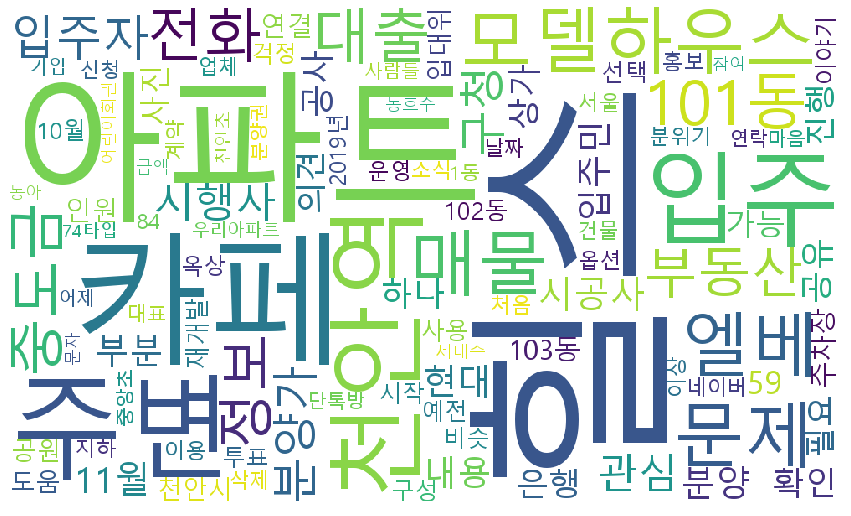

In [15]:
#워드클라우드 그리기

wordcloud=WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',background_color='white',width=1000,height=600).generate_from_frequencies(dict(tags))

fig=plt.figure(figsize=(15,10))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()


In [43]:
from gensim.models import Word2Vec
from konlpy.tag import Okt

okt=Okt()

result=[]
for t in rvsd_item1: #퍼포먼스가 떨어져서 특정 단어만 필터링 rvsd_item1
    tokenlist=okt.pos(t,stem=True,norm=True) #단어 토큰화   
    temp=[]
    for word in tokenlist:
        if word[1] in ["Noun"]:
            if len(word[0]) > 1:  #한글자는 무시
                if word[0] not in stop_words: #불용어 적용
                    temp.append(word[0])
    result.append(temp)

In [44]:
print('총 단어수는 {}'.format(len(result)))

총 단어수는 1326


In [45]:
from gensim.models import Word2Vec
model = Word2Vec(result, size=100, window=5, min_count=10, workers=5, sg=1)

In [46]:
model_result1=model.wv.most_similar("엘베")
print(model_result1)

[('회원', 0.8772754669189453), ('힐스', 0.8752459287643433), ('카페', 0.8716346025466919), ('분양', 0.8676040172576904), ('가입', 0.8656147718429565), ('천안역', 0.864510715007782), ('주민', 0.8639183044433594), ('임대', 0.8610396385192871), ('매물', 0.8601266145706177), ('사업', 0.8563406467437744)]


In [47]:
from sklearn.manifold import TSNE

voca=list(model.wv.vocab)
X=model[voca]

tsne=TSNE(n_components=2)
X_tsne=tsne.fit_transform(X)

C:\Users\inter\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


In [48]:
df=pd.DataFrame(X_tsne,index=voca,columns=['x','y'])
df.shape

(119, 2)

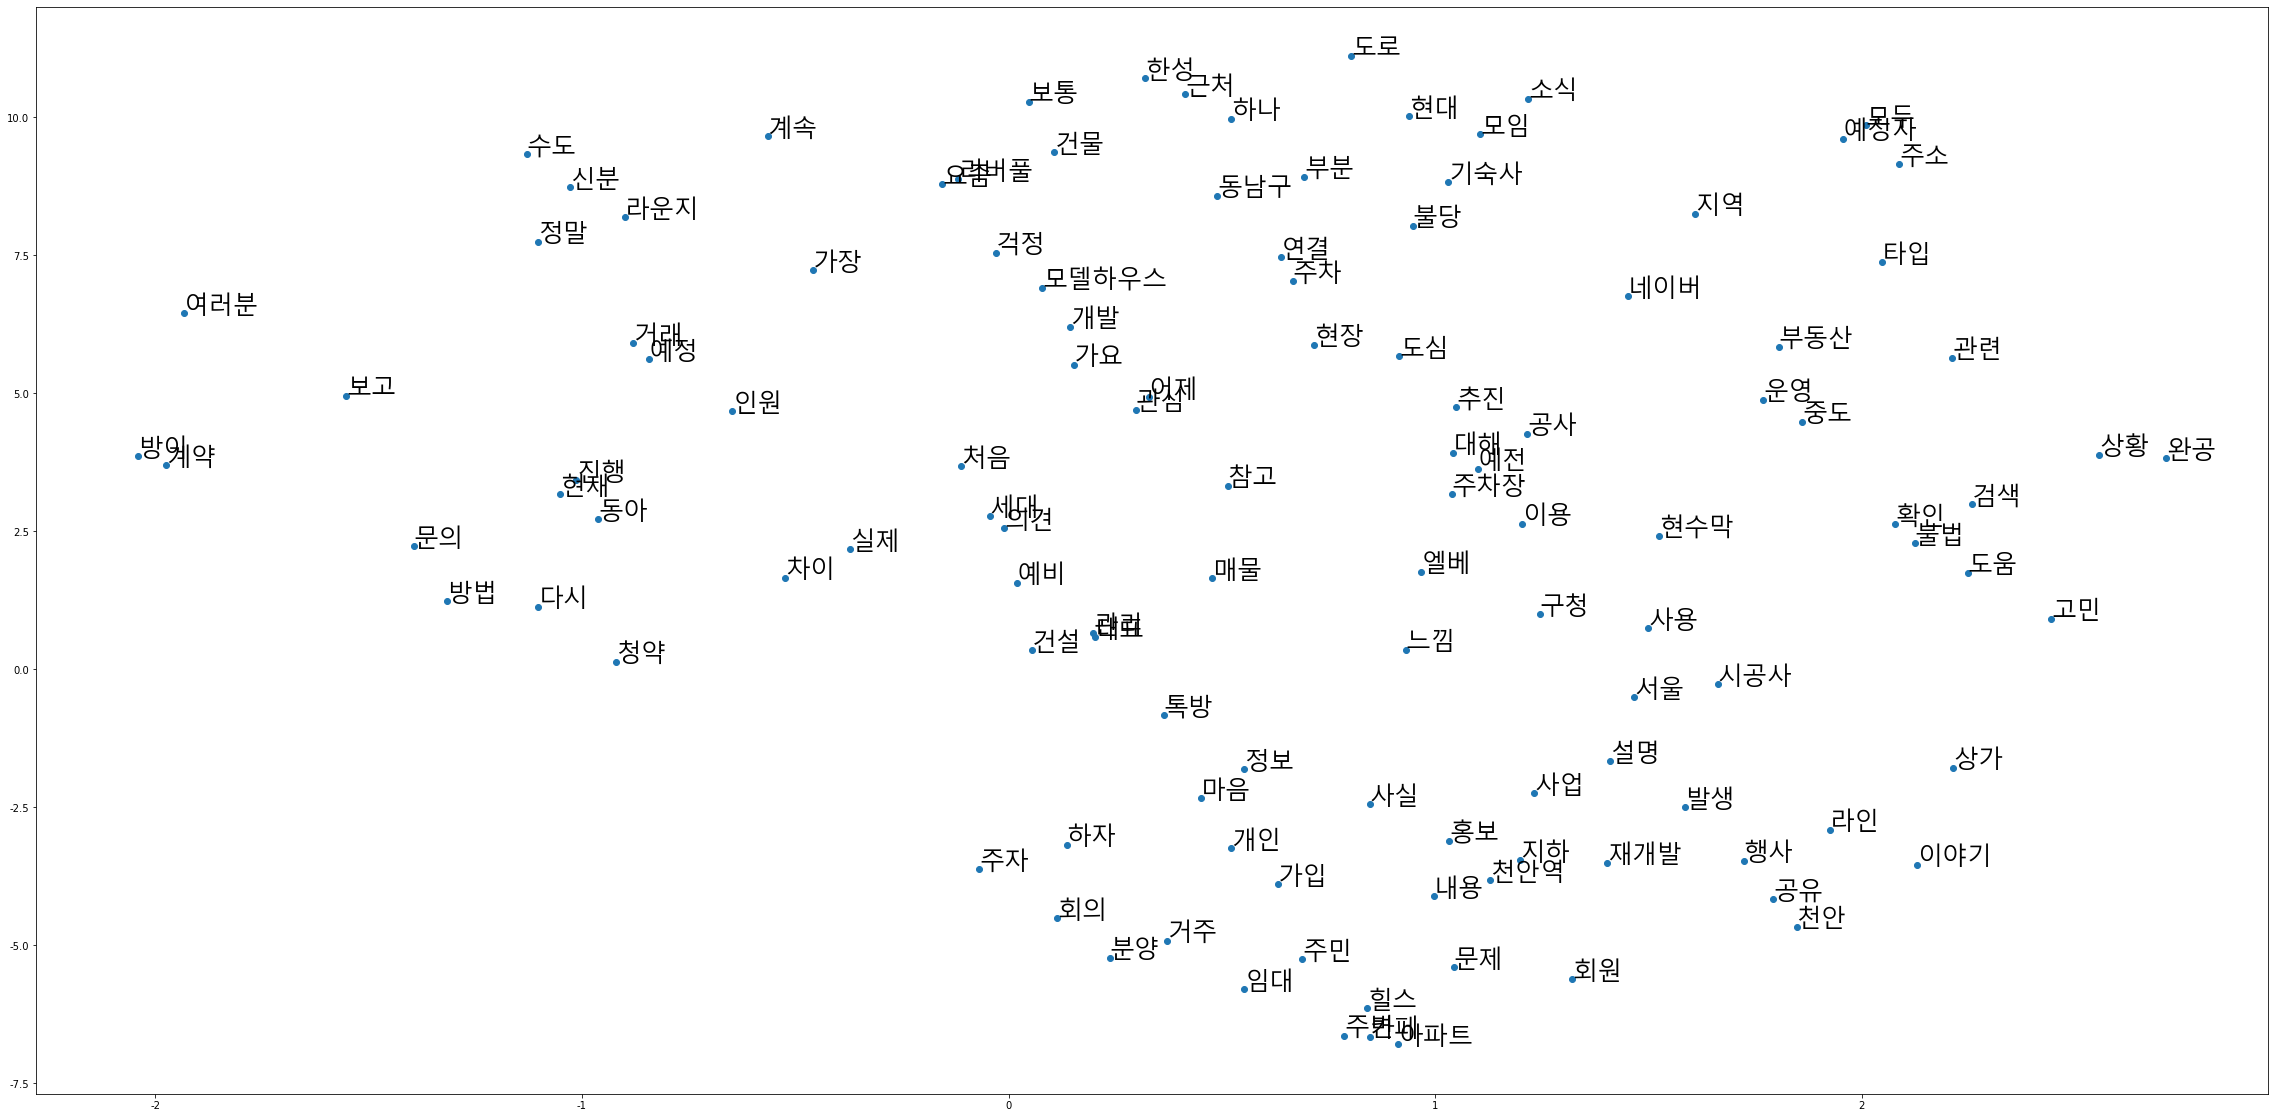

In [49]:
%matplotlib inline

path_gothic = "c:/Windows/Fonts/malgun.ttf"
prop = fm.FontProperties(fname=path_gothic)
matplotlib.rcParams["axes.unicode_minus"] = False

fig = plt.figure()
fig.set_size_inches(40, 20)
ax = fig.add_subplot(1, 1, 1)
ax.scatter(df["x"], df["y"])

for word, pos in list(df.iterrows()):
    ax.annotate(word, pos, fontsize=25, fontproperties=prop)
plt.show()